<a href="https://colab.research.google.com/github/duybluemind1988/project_py/blob/main/Churn/Churn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get data

In [ ]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data analysis

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
X_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [ ]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


In [ ]:
print(X_train.shape)
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_train = X_train.dropna()
print(X_train.shape) # remove 7 values

(4507, 20)
(4500, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(X_test.shape)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
X_test = X_test.dropna()
print(X_test.shape) # remove 7 values

(1409, 20)
(1407, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Sweetvis

In [ ]:
#!pip install sweetviz

In [ ]:
import sweetviz as sv

my_report = sv.analyze(X_train)
my_report.show_html("analyze.html",open_browser=False) # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.


In [ ]:
import IPython
IPython.display.HTML("analyze.html")

In [ ]:
compare_report = sv.compare([X_train,"train"],[X_test,"test"])
compare_report.show_html("compare.html",open_browser=False) 

In [ ]:
IPython.display.HTML("compare.html")

## Autovis

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz(path)

## Dtale

In [ ]:
#!pip install dtale

In [ ]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True
dtale.show(X_train)

https://ddzhzwx83oe-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/7

In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try Worflow (fail)

In [ ]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
X_train.dtypes
X_train.isnull().sum()

In [ ]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


In [ ]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
731,6621-YOBKI,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,92.75
5546,7880-XSOJX,Male,0,No,No,4,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,42.40,146.4
3023,0238-WHBIQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.70,6339.3
3914,1755-FZQEC,Male,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,791.15
4787,5542-DHSXL,Female,0,Yes,No,4,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.70,235.05


- Replace '' in Total charges column
- Convert to category or ordinal encoder or one hot encoder
- No need to remove NA value for tree method


In [ ]:
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [ ]:
def to_category(x):
  return x.astype("category")

to_category_transform = preprocessing.FunctionTransformer(to_category)

In [ ]:
X_train_a = to_category_transform.fit_transform(X_train)
X_train_a["gender"]

731       Male
5546      Male
3023      Male
3914      Male
4787    Female
         ...  
913       Male
3170      Male
1222      Male
5109      Male
6524      Male
Name: gender, Length: 4507, dtype: category
Categories (2, object): ['Female', 'Male']

In [ ]:
#Standard scaler all numeric value
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = pipeline.Pipeline(steps=[('scaler', preprocessing.StandardScaler())])

#Convert to category all category value
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = pipeline.Pipeline(steps=[("astype_category",to_category_transform)])


transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categoric', categorical_transformer, categorical_features),
]
preprocessor = compose.ColumnTransformer(transformers)

In [ ]:
# Create transform X value
X_train_tran = preprocessor.fit_transform(X_train)
X_test_tran=preprocessor.transform(X_test)

In [ ]:
pd.DataFrame(X_train_tran)

In [ ]:
pd.DataFrame(X_test_tran)[5]

0       Female
1       Female
2         Male
3       Female
4         Male
         ...  
1404      Male
1405      Male
1406      Male
1407      Male
1408    Female
Name: 5, Length: 1409, dtype: object

In [ ]:
# Keep track transformer colum names:
def get_transformer_feature_names(columnTransformer): #mean: preprocessor 

    output_features = []

    for name, pipe, features in columnTransformer.transformers_:
        if name!='remainder':
            for i in pipe:
                trans_features = []
                if hasattr(i,'categories_'):
                    trans_features.extend(i.get_feature_names(features))
                else:
                    trans_features = features
            output_features.extend(trans_features)

    return output_features
print(len(get_transformer_feature_names(preprocessor)))
get_transformer_feature_names(preprocessor)

20


['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
#Apply name to X_train and X_test after transformer
X_train_tran_df=pd.DataFrame(X_train_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_test_tran_df=pd.DataFrame(X_test_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_train_tran_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.42989,-1.12507,-1.48178,-0.972213,6621-YOBKI,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
1,-0.42989,-1.1657,-0.742942,-0.948456,7880-XSOJX,Male,No,No,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check
2,-0.42989,1.59694,0.841966,1.7939,0238-WHBIQ,Male,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
3,-0.42989,0.256246,-1.49686,-0.662946,1755-FZQEC,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
4,-0.42989,-1.1657,-0.330799,-0.9092,5542-DHSXL,Female,Yes,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check


# Try normal

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,cross_validate
#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,precision_score,roc_curve,auc,precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score,average_precision_score
from sklearn.metrics import make_scorer

In [4]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
731,6621-YOBKI,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,92.75
5546,7880-XSOJX,Male,0,No,No,4,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,42.40,146.4
3023,0238-WHBIQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.70,6339.3
3914,1755-FZQEC,Male,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,791.15
4787,5542-DHSXL,Female,0,Yes,No,4,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.70,235.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,5993-BQHEA,Male,0,No,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.05,267
3170,7272-QDCKA,Male,0,No,No,28,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Electronic check,100.20,2688.45
1222,9091-WTUUY,Male,0,Yes,Yes,64,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,No,Mailed check,69.25,4447.75
5109,7113-HIPFI,Male,0,Yes,Yes,66,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,65.85,4097.05


In [9]:
X_train=X_train.drop(["customerID"],axis=1)
X_train=X_train.astype("category")
X_test=X_test.drop(["customerID"],axis=1)
X_test=X_test.astype("category")

## Test each model

In [10]:
# evaluate the model
model = LGBMClassifier()
cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
n_scores = model_selection.cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.689 (0.021)


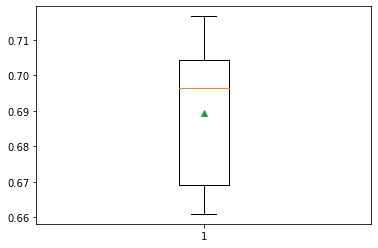

In [11]:
from matplotlib import pyplot
# plot model performance for comparison
pyplot.boxplot(n_scores, showmeans=True)
pyplot.show()

In [18]:
model=LGBMClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('f1 score:',f1_score(y_test,predictions,average="macro"))
print(classification_report(y_test,predictions))

[[902 133]
 [166 208]]
Balanced Accuracy score: 0.7138236585806919
f1 score: 0.7198201703194571
              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1035
         Yes       0.61      0.56      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,rfc_pred))
print('f1 score:',f1_score(y_test,predictions,average=None))
print(classification_report(y_test,rfc_pred))

ValueError: ignored

## Try different model

In [ ]:
# Creating a list of the classifiers
classifiers = {
    #'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    #'NB':GaussianNB(),
    #'SVC':SVC(), #only 0.5 not suitable for imbalanced data set before tunning
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging (very long)
    #'AB':AdaBoostClassifier(),  #Boosting
    #'GBM':GradientBoostingClassifier(), #Boosting
    #'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting
    
}

In [ ]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


LR
time : 0.081 

LR: train_acc: nan train_rec_macro: nan train_prec_macro: nan   test_acc: nan test_rec_macro: nan test_prec_macro: nan   fit_time: 0.01
LDA
time : 0.077 

LDA: train_acc: nan train_rec_macro: nan train_prec_macro: nan   test_acc: nan test_rec_macro: nan test_prec_macro: nan   fit_time: 0.01
CART


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'Male'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'Male'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'Male'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

time : 0.089 

CART: train_acc: nan train_rec_macro: nan train_prec_macro: nan   test_acc: nan test_rec_macro: nan test_prec_macro: nan   fit_time: 0.02
RF
time : 0.084 

RF: train_acc: nan train_rec_macro: nan train_prec_macro: nan   test_acc: nan test_rec_macro: nan test_prec_macro: nan   fit_time: 0.01
XGB
time : 0.046 

XGB: train_acc: nan train_rec_macro: nan train_prec_macro: nan   test_acc: nan test_rec_macro: nan test_prec_macro: nan   fit_time: 0.01
LGBM
time : 2.280 

LGBM: train_acc: 0.89 train_rec_macro: 0.89 train_prec_macro: 0.90   test_acc: 0.69 test_rec_macro: 0.69 test_prec_macro: 0.71   fit_time: 0.19


In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
5,LGBM,0.689814,0.689814,0.709057,0.697614,0.889124,0.889124,0.898517,0.893644,0.192119,2.280472
0,LR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013486,0.081340
1,LDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012746,0.076884
2,CART,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015030,0.089018
3,RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014119,0.083673
4,XGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007204,0.045903


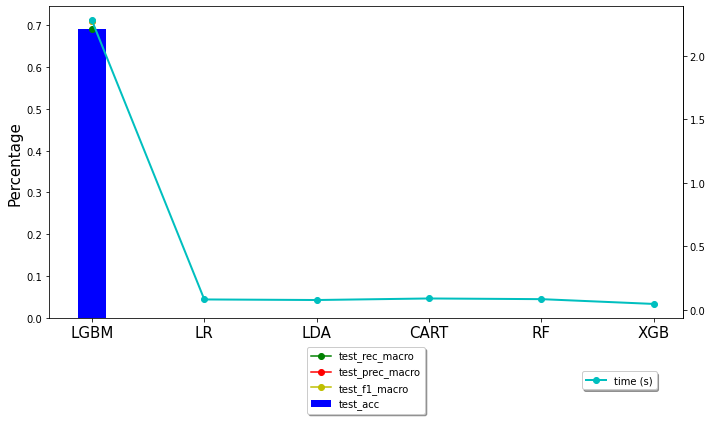

In [ ]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
test_f1_macro=df_results_val['test_f1_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')
rects4 = ax.plot(x, test_prec_macro, color = 'y',marker='o',label='test_f1_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

## Grid search

In [ ]:
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

In [ ]:

lgb_estimator =LGBMClassifier(boosting_type='gbdt',  objective='binary', 
                              num_boost_round=2000, learning_rate=0.01, metric='balanced_accuracy')
cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

gsearch = model_selection.GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=cv)
lgb_model = gsearch.fit(X=X_train, y=y_train)

print(lgb_model.best_params_, lgb_model.best_score_)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


KeyboardInterrupt: ignored